# Overview

In [1]:
#File Name: Figure_1.ipynb
#Author: Matthias M. Fischer
#Last Revision: 16th March 2022
#Changelog: Initial Version.

#This file contains the complete commented source code
#for reproducing all plots from Figure 1 of the manuscript
#by Fischer and Blüthgen.

# Setup

In [2]:
# Library imports

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
# Convenience function:
# Return the maximum real part of all
# eigenvalues of a given matrix M

def lambdamax(M):
    return np.max(np.real(np.linalg.eigvals(M)))

In [4]:
# Return the coefficient matrix A describing
# the model where all NSCC compartments
# dedifferentiate

def A(K_C=1.0,                                        # CSC cycling rate
      K_N=1.0,                                        # NSCC cycling rate
      K_T=0.05,                                       # Dedifferentiation rate
      P_S=0.18,                                       # Probability CSC doubling
      P_A=0.82,                                       # Probability CSC asymmetric doubling
      P_D=0,                                          # Probability CSC double differentiation
      D_C=0.05,                                       # CSC apoptosis rate
      D_N=0.05,                                       # NSCC apoptosis rate
      M=7):                                           # Number NSCC compartments
    
    beta = (P_S-P_D)*K_C - D_C                        # CSC compartment net growth rate
    iota = (P_A + 2*P_D)*K_C                          # Influx rate compartment N_1, in multiples of C(t)
 
    A = np.zeros((M+1, M+1))                          # Initialise coefficient matrix A
    A[0,0] = beta                                     # A_{1,1} := beta
    A[1,0] = iota                                     # A_{2,1} := iota
    
    for i in range(1, M+1):                           # A_{1,i} := K_T for i in [2...M]
        A[0,i] = K_T
    
    for i in range(1, M):                             # A_{i,i} := -K_N - K_T - D_N for i in [1,M-1]
        A[i,i] = -K_N - K_T - D_N
    
    A[M,M] = -K_T - D_N                               # A_{M+1, M+1} := -K_T - D_N
    
    for i in range(2,M+1):                            # A_{i, i-1} := 2*K_N for i in [2, M]
        A[i,i-1] = 2*K_N
        
    return A

In [5]:
# Return the coefficient matrix A describing
# the model where only a set S of NSCC
# compartments dedifferentiate.

def A_S(S,                                            # Indices of all NSCC compartments that dedifferentiate
      K_C=1.0,                                        # CSC cycling rate
      K_N=1.0,                                        # NSCC cycling rate
      K_T=0.05,                                       # Dedifferentiation rate
      P_S=0.18,                                       # Probability CSC doubling
      P_A=0.82,                                       # Probability CSC asymmetric doubling
      P_D=0,                                          # Probability CSC double differentiation
      D_C=0.05,                                       # CSC apoptosis rate
      D_N=0.05,                                       # NSCC apoptosis rate
      M=7):                                           # Number NSCC compartments
    
    C = A(K_C=K_C, K_N=K_N, K_T=0, P_S=P_S,           # Compute coefficient matrix without any dedifferentiation
        P_A=P_A, P_D=P_D, M=M, D_C=D_C, D_N=D_N)
    
    if 0 in S:                                        # Sanity check: CSCs (index 0) cannot dedifferentiate
        assert False, "CSCs cannot dedifferentiate"
    
    for s in S:                                       # Add dedifferentiation to coefficient matrix
        C[0, s] = K_T
        C[s, s] -= K_T
 
    return C

# Figure 1B

(0.0, 1.0)

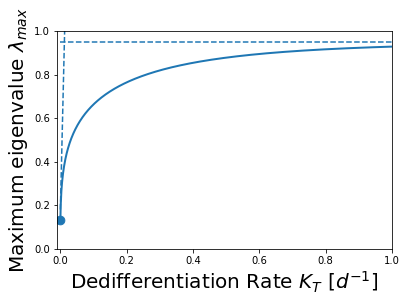

In [6]:
# Plot maximum real part of all system eigenvalues
# for systematically altered dedifferentiation rate K_T
# under standard parametrisation, where all
# NSCC compartments can dedifferentiate.

# Plot
K_T = np.arange(0, 1, .001)
lambda_max = list(map(lambda K_T: lambdamax(A(K_T=K_T)), K_T))
plt.plot(K_T, lambda_max, lw=2)
plt.scatter(K_T[0], lambda_max[0], s=75)

# Add asymptote for large K_T
# (lambda_max <= beta + iota; based on Gershgorin)
x = [0, 1]
y = [0.13 + 0.82, 0.13 + 0.82]
plt.plot(x, y, c="C0", ls="--")

# Add asymptote for small K_T
# (lambda_max = beta + 2^(n-2) * K_T,
# based on analyt. pert. theory,
# assuming beta and D_N being small)
x = [0, 0.1]
y = [0.18 + 2**6 * 0, 0.18 + 2**6 * 0.1]
plt.plot(x, y, c="C0", ls="--")

# Axis labels and limits
plt.xlabel("Dedifferentiation Rate $K_T \ [d^{-1}]$", fontsize=20)
plt.ylabel("Maximum eigenvalue $\lambda_{max}$", fontsize=20)
plt.xlim(-0.01,1)
plt.ylim(0,1)

# Figure 1C

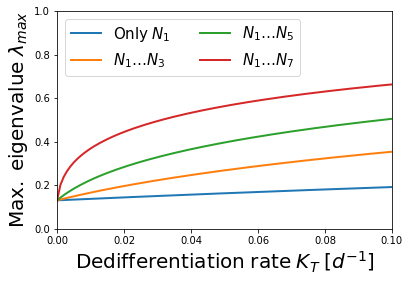

In [7]:
# Plot maximum real part of all system eigenvalues
# for systematically altered dedifferentiation rate K_T
# and systematically altered number of dedifferentiating
# NSCC compartments under standard parametrisation

# Plot lambda_max over K_T, if only N_1 cells dedifferentiate
K_T = np.arange(0, 1, .001)
lambda_max = list(map(lambda K_T: lambdamax(A_S(S=[1], K_T=K_T)), K_T))
plt.plot(K_T, lambda_max, label=r"$\mathrm{Only \; } N_1$", lw=2)

# And the same for N_1...N_3, N_1...N_5, and N_1...N_7
for i in [3,5,7]:
    S = [j for j in range(1, i+1)]
    lambda_max = list(map(lambda K_T: lambdamax(A_S(S=S, K_T=K_T)), K_T))
    plt.plot(K_T, lambda_max, label=r"$N_1 \dots N_"+str(i)+"$", lw=2)

# Labels and limits
plt.xlim((0, 0.1))
plt.ylim((0,1))
plt.xlabel(r"$\mathrm{Dedifferentiation \; rate \; } K_T \; [d^{-1}]$", fontsize=20)
plt.ylabel(r"$\mathrm{Max. \; eigenvalue \; } \lambda_{max}$", fontsize=20)
plt.legend(loc=2, ncol=2, fontsize=15)


# Figure 1D

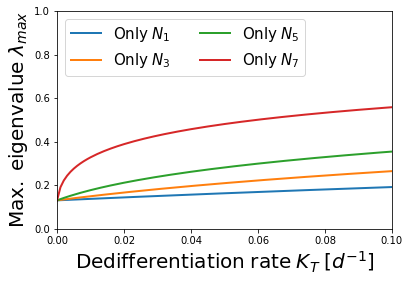

In [8]:
# Plot maximum real part of all system eigenvalues
# for systematically altered dedifferentiation rate K_T
# and systematically altered single dedifferentiating NSCC compartment
# under standard parametrisation

K_T = np.arange(0, 1, .001)
for i in [1,3,5,7]:
    lambda_max = list(map(lambda K_T: lambdamax(A_S(S=[i], K_T=K_T)), K_T))
    plt.plot(K_T, lambda_max, label=r"$\mathrm{Only \; } N_" + str(i) + "$", lw=2)


# Labels and limits
plt.xlim((0, 0.1))
plt.ylim((0,1))
plt.xlabel(r"$\mathrm{Dedifferentiation \; rate \; } K_T \; [d^{-1}]$", fontsize=20)
plt.ylabel(r"$\mathrm{Max. \; eigenvalue \; } \lambda_{max}$", fontsize=20)
plt.legend(loc=2, ncol=2, fontsize=15)
